In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os.path
import sys
import time
import math
import tensorflow as tf

import numpy as np
import sklearn.metrics as sk

import models
from load_data import *
import json

from matplotlib import pyplot as plt
%matplotlib inline

# Basic model parameters as external flags.
FLAGS = None

parser = argparse.ArgumentParser()

# Input parameters
parser.add_argument(
        '--config_dir',
        type=str,
        default='models/1/config.json',
        help='Directory with config file')

parser.add_argument(
        '--checkpoint',
        type=str,
        default='model.ckpt-50',
        help='checkpoint')

parser.add_argument(
        '--data',
        type=str,
        default='test_file',
        help='3 choices "test_file", "dev_file", "train_file"')

FLAGS, unparsed = parser.parse_known_args()

# Set parameters to convey to the model
model_settings = json.load(open(FLAGS.config_dir,"r"))

# Constants used for dealing with the tfrecords files.
VALID_FILE = '../../data/tfrecords/mgb3_logmel_fft400_hop160_vad_cmvn_dev.0.tfrecords'
labels = ['EGY', 'GLF', 'LAV', 'MSA', 'NOR']

(10, 1803, 40)
(1803, 40)
[817  40]


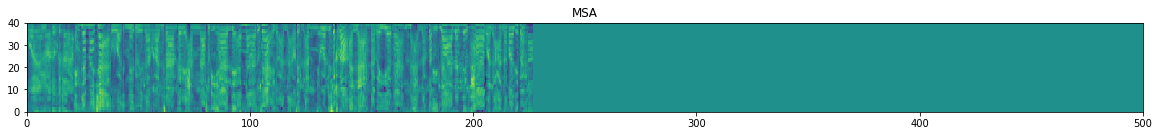

(1803, 40)
[919  40]


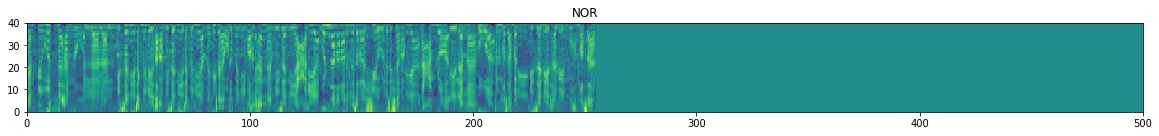

(1803, 40)
[1409   40]


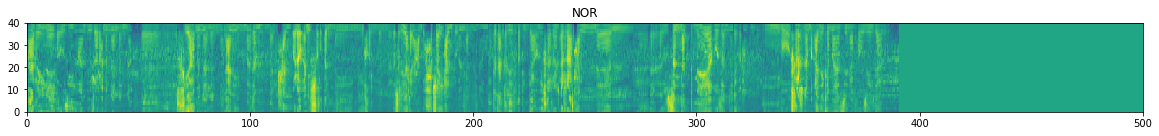

(1803, 40)
[1803   40]


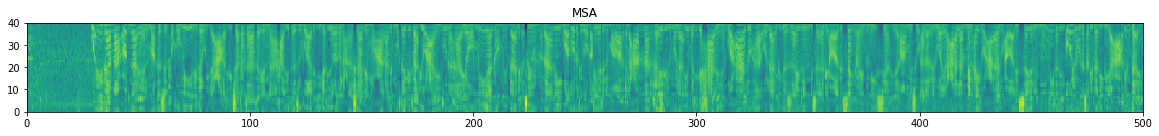

(1803, 40)
[814  40]


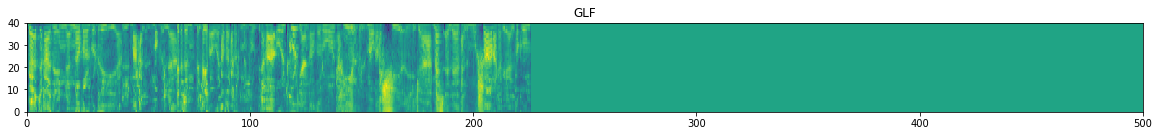

(1803, 40)
[1404   40]


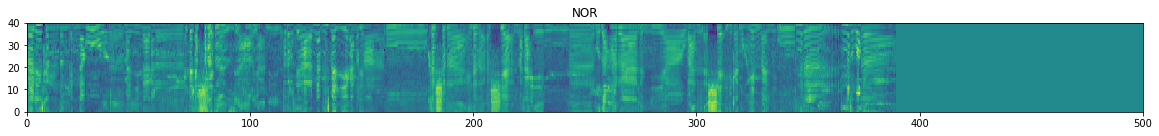

(1803, 40)
[920  40]


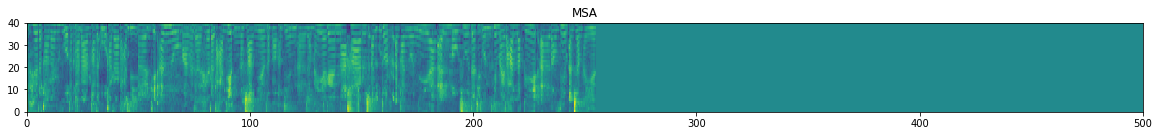

(1803, 40)
[1120   40]


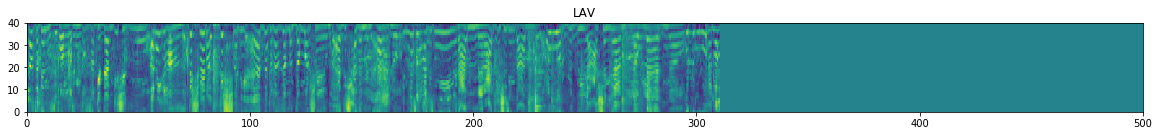

(1803, 40)
[1409   40]


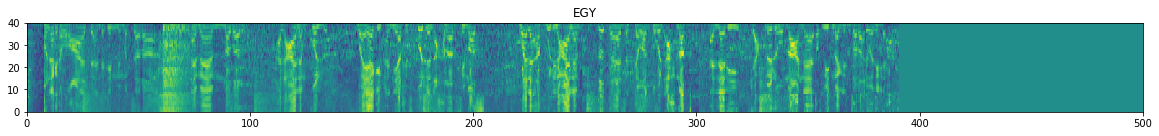

(1803, 40)
[1754   40]


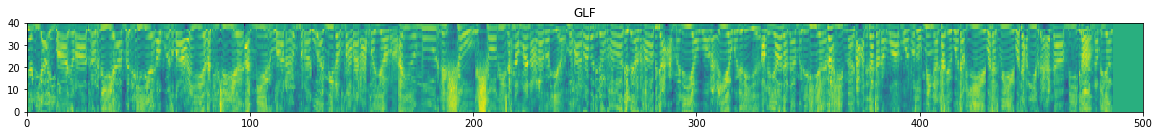

In [2]:
# Tell TensorFlow that the model will be built into the default Graph.
with tf.Graph().as_default():    
        
    # Input images and labels
    label_batch, feat2d_batch, shape_batch = inputs(
            VALID_FILE, batch_size=model_settings["batch_size"])
    
    with tf.Session() as sess:
        imgs, real_shapes, labs = sess.run([feat2d_batch, shape_batch, label_batch])
        print(imgs.shape)
        for i in range(10):
            print(imgs[i].shape)
            print(real_shapes[i])
            plt.figure(figsize=(20,10))
            plt.imshow(np.transpose(imgs[i]), extent=[0,500,0,40])
            plt.title(labels[labs[i]])
            plt.show()


(10, 9740, 40)
(9740, 40)
[728  40]


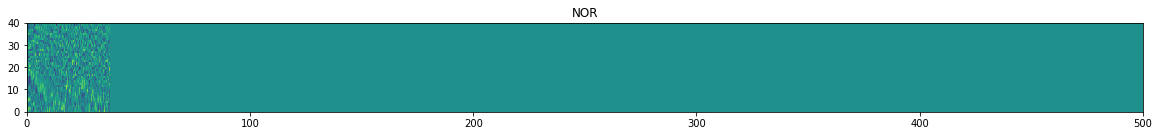

(9740, 40)
[1189   40]


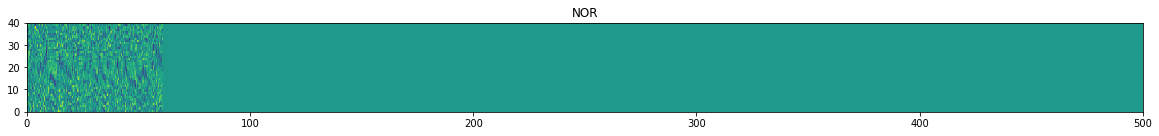

(9740, 40)
[199  40]


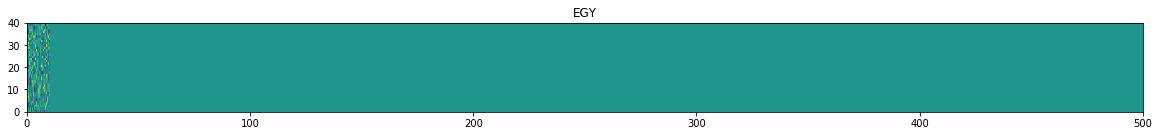

(9740, 40)
[468  40]


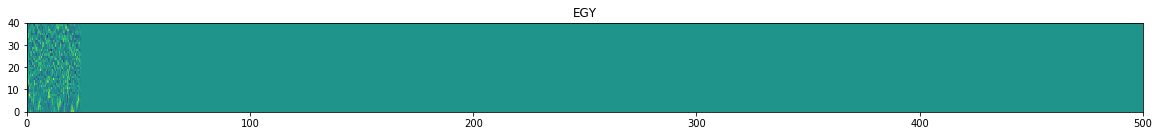

(9740, 40)
[398  40]


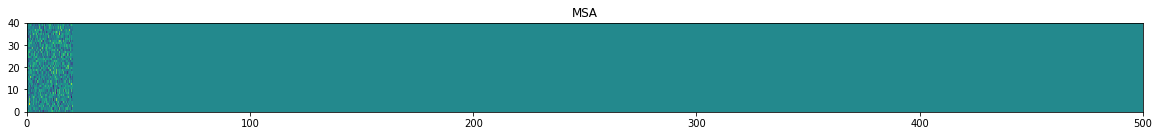

(9740, 40)
[9740   40]


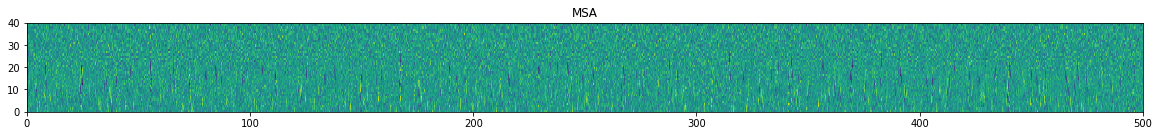

(9740, 40)
[1447   40]


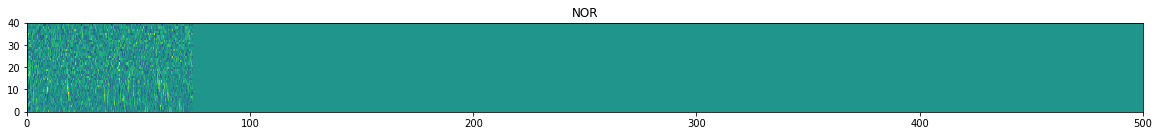

(9740, 40)
[4187   40]


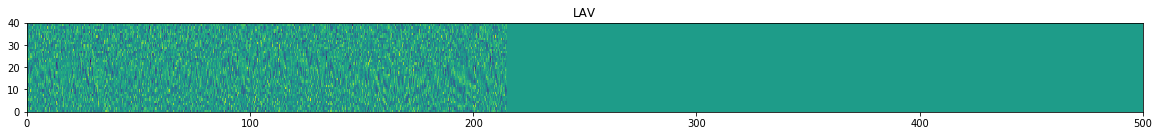

(9740, 40)
[110  40]


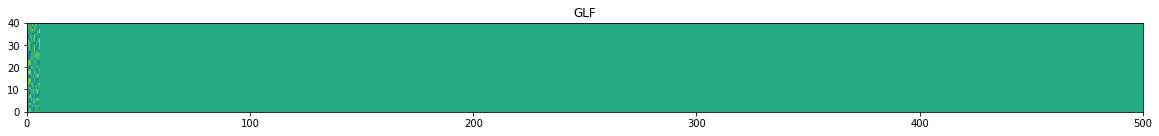

(9740, 40)
[710  40]


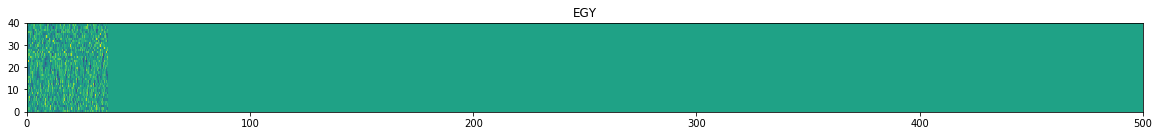

In [4]:
VALID_FILE = '../../data/tfrecords/mgb3_mfcc_fft400_hop160_vad_cmvn_dev.0.tfrecords'

# Tell TensorFlow that the model will be built into the default Graph.
with tf.Graph().as_default():    
        
    # Input images and labels
    label_batch, feat2d_batch, shape_batch = inputs(
            VALID_FILE, batch_size=model_settings["batch_size"])
    
    with tf.Session() as sess:
        imgs, real_shapes, labs = sess.run([feat2d_batch, shape_batch, label_batch])
        print(imgs.shape)
        for i in range(10):
            print(imgs[i].shape)
            print(real_shapes[i])
            plt.figure(figsize=(20,10))
            plt.imshow(np.transpose(imgs[i]), extent=[0,500,0,40])
            plt.title(labels[labs[i]])
            plt.show()